# Exercise - Basic Training Workflow

## Objective
Predict PM2.5 concentration based on the other features.

# Dataset

https://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data

Attribute Information:

```
No: row number 
year: year of data in this row 
month: month of data in this row 
day: day of data in this row 
hour: hour of data in this row 
pm2.5: PM2.5 concentration (ug/m^3) 
DEWP: Dew Point (â„ƒ) 
TEMP: Temperature (â„ƒ) 
PRES: Pressure (hPa) 
cbwd: Combined wind direction 
Iws: Cumulated wind speed (m/s) 
Is: Cumulated hours of snow 
Ir: Cumulated hours of rain
```

# Tasks

1. Import data through read_csv
2. Explore / transform / clean data
3. Shuffle data and split into training and test sets
4. Scale the training and test sets
5. Train linear regression and evaluate metrics
6. Train linear regression with Stochastic Gradient Descent and evaluate metricsy
7. Get a prediction

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.decomposition import PCA

## 1. Import data through read_csv

Check:
- Did the data import correctly?
- What are the types of each column?
- How large is the dataset?

In [15]:
df = pd.read_csv('/tmp/PRSA_data_2010.1.1-2014.12.31.csv')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [16]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [17]:
df.dtypes

No         int64
year       int64
month      int64
day        int64
hour       int64
pm2.5    float64
DEWP       int64
TEMP     float64
PRES     float64
cbwd      object
Iws      float64
Is         int64
Ir         int64
dtype: object

## 2. Explore / transform / clean data

You should:
- do something with the NaN values
- ignore the non-numeric column for now. We will cover label encoding later (if you are really curious or want to try it, open clustering.ipynb and search for 'LabelEncoder').
- plot the data to see if there is a correlation:
   - plotting the data in 2d or 3d (your choice), or
   - plotting multiple plots if you rather not use PCA

In [18]:
df[df.isnull().any(axis=1)]

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
5,6,2010,1,1,5,NaN,-19,-10.0,1017.0,NW,16.10,0,0
6,7,2010,1,1,6,NaN,-19,-9.0,1017.0,NW,19.23,0,0
7,8,2010,1,1,7,NaN,-19,-9.0,1017.0,NW,21.02,0,0
8,9,2010,1,1,8,NaN,-19,-9.0,1017.0,NW,24.15,0,0
9,10,2010,1,1,9,NaN,-20,-8.0,1017.0,NW,27.28,0,0


In [19]:
# The NaNs are on pm2.5, okay to drop the rows, because we are missing truth values
# These NaNs may be helpful extra test data in the future

df.dropna(inplace=True)
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000,41757.000000
mean,22279.380104,2012.042771,6.513758,15.685514,11.502311,98.613215,1.750174,12.401561,1016.442896,23.866747,0.055344,0.194866
std,12658.168415,1.415311,3.454199,8.785539,6.924848,92.050387,14.433658,12.175215,10.300733,49.617495,0.778875,1.418165
min,25.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,11464.000000,2011.000000,4.000000,8.000000,5.000000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,22435.000000,2012.000000,7.000000,16.000000,12.000000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,33262.000000,2013.000000,10.000000,23.000000,18.000000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,565.490000,27.000000,36.000000


plot the data to see if there is a correlation:
- plotting the data in 2d or 3d (your choice), or
- plotting multiple plots if you rather not use PCA

In [35]:
# easiest way (I find) is this way (handles lots of columns):
X_columns = list(df.columns.values)
X_columns.remove('No')
X_columns.remove('cbwd')
X_columns.remove('pm2.5')

X = df.loc[:, X_columns]
y = df['pm2.5']

print(X.head())
print(y.head())

    year  month  day  hour  DEWP  TEMP    PRES   Iws  Is  Ir
24  2010      1    2     0   -16  -4.0  1020.0  1.79   0   0
25  2010      1    2     1   -15  -4.0  1020.0  2.68   0   0
26  2010      1    2     2   -11  -5.0  1021.0  3.57   0   0
27  2010      1    2     3    -7  -5.0  1022.0  5.36   1   0
28  2010      1    2     4    -7  -5.0  1022.0  6.25   2   0
24    129.0
25    148.0
26    159.0
27    181.0
28    138.0
Name: pm2.5, dtype: float64


<IPython.core.display.Javascript object>


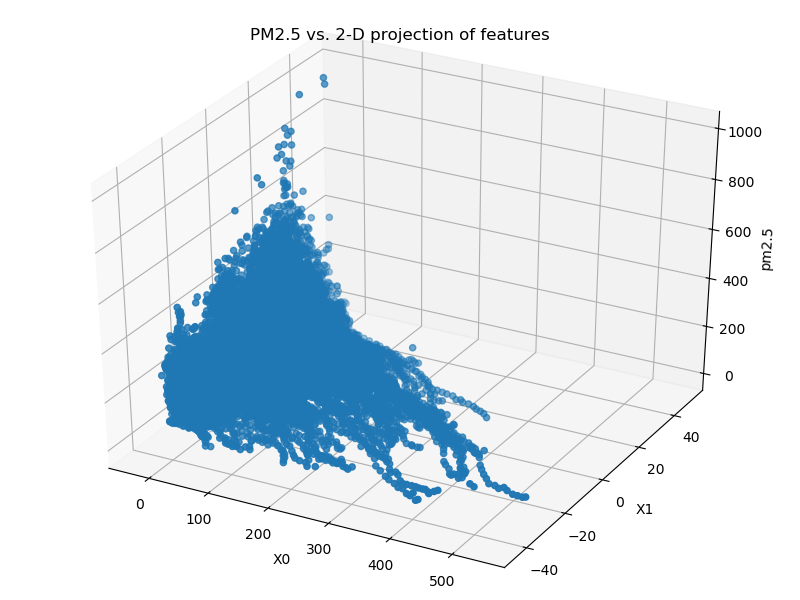

In [37]:
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook

pca = PCA(n_components=2)
X_2d = pca.fit_transform(X)

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig)

# Create a scatter plot on the 3D axes.
# x-axis = column 0 of X_2d, y-axis = column 1 of X_2d, z-axis: pm2.5
ax.scatter(X_2d[:, 0], X_2d[:, 1], y)
ax.set_xlabel('X0')
ax.set_ylabel('X1')
ax.set_zlabel('pm2.5')
ax.set(title = 'PM2.5 vs. 2-D projection of features')
plt.show()

## 3. Shuffle data and split into training and test sets

In [45]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=.1)

print(train_X.shape, test_X.shape, train_y.shape, test_y.shape)

(37581, 10) (4176, 10) (37581,) (4176,)


## 4. Scale the training and test sets

In [52]:
X_scaler = StandardScaler()
y_scaler = StandardScaler()

train_X_scaled = X_scaler.fit_transform(train_X)
test_X_scaled = X_scaler.transform(test_X)

train_y_scaled = y_scaler.fit_transform(train_y.values.reshape(-1, 1))
test_y_scaled = y_scaler.transform(test_y. values.reshape(-1, 1))

print(train_X_scaled)
print(train_y_scaled)

[[-0.73830685 -0.72571212  0.83132696 ...  0.08837416 -0.0711908
  -0.13670956]
 [-0.03150255 -0.14692586 -0.42056942 ... -0.41874661 -0.0711908
  -0.13670956]
 [ 1.38210606  0.14246727  1.05894449 ... -0.02949496 -0.0711908
  -0.13670956]
 ...
 [-0.73830685 -1.30449838  0.94513572 ...  0.25100115 -0.0711908
  -0.13670956]
 [-0.03150255  0.72125352 -1.44484828 ...  0.23277397 -0.0711908
  -0.13670956]
 [-0.73830685 -0.14692586  1.05894449 ... -0.46411205 -0.0711908
  -0.13670956]]
[[-0.91652394]
 [-1.02473862]
 [-0.58105846]
 ...
 [ 2.01609369]
 [-0.88405954]
 [-0.77584487]]


## 5. Train linear regression and evaluate metrics

In [59]:
lin = LinearRegression()
lin.fit(train_X_scaled, train_y_scaled)

lin_pred_scaled = lin.predict(test_X_scaled)
print(lin.coef_, lin.intercept_)

print('MSE:', mean_squared_error(test_y_scaled, lin_pred_scaled))
print('R2:', r2_score(test_y_scaled, lin_pred_scaled))

[[ 0.01289371 -0.05511074  0.07243428  0.12460308  0.74260144 -0.87901241
  -0.17641789 -0.13627743 -0.02490429 -0.11425052]] [2.92138626e-16]
MSE: 0.6900572733701562
R2: 0.25177020225297864


## 6. Train linear regression with Stochastic Gradient Descent and evaluate metrics

In [58]:
sgd = SGDRegressor(verbose=True, tol=1e-9, max_iter=1000)
sgd.fit(train_X_scaled, train_y_scaled.ravel())

sgd_pred_scaled = sgd.predict(test_X_scaled)
print(sgd.coef_, sgd.intercept_)

print('MSE:', mean_squared_error(test_y_scaled, sgd_pred_scaled))
print('R2:', r2_score(test_y_scaled, sgd_pred_scaled))

-- Epoch 1
Norm: 1.17, NNZs: 10, Bias: -0.009839, T: 37581, Avg. loss: 0.377628
Total training time: 0.01 seconds.
-- Epoch 2
Norm: 1.19, NNZs: 10, Bias: 0.008539, T: 75162, Avg. loss: 0.371853
Total training time: 0.01 seconds.
-- Epoch 3
Norm: 1.20, NNZs: 10, Bias: -0.007687, T: 112743, Avg. loss: 0.371677
Total training time: 0.02 seconds.
-- Epoch 4
Norm: 1.18, NNZs: 10, Bias: -0.016018, T: 150324, Avg. loss: 0.371526
Total training time: 0.02 seconds.
-- Epoch 5
Norm: 1.18, NNZs: 10, Bias: -0.002601, T: 187905, Avg. loss: 0.371541
Total training time: 0.03 seconds.
Convergence after 5 epochs took 0.03 seconds
[ 0.03545135 -0.08048992  0.07400821  0.1111971   0.74414553 -0.87134583
 -0.17320594 -0.12819056 -0.02560981 -0.1198317 ] [-0.00260076]
MSE: 0.6906254918672542
R2: 0.2511540823632725


In [67]:
# Think of ways to make predictions better.
#
# Ways to improve:
# May want to try to add back the combined wind speed column
# It's a time series and there may be seasonality / cyclical components to remove out.

## 7. Get a prediction

In [66]:
test_input = test_X[:5]
test_input_scaled = X_scaler.transform(test_input)

truths = test_y[:5]

results_sgd = y_scaler.inverse_transform(sgd.predict(test_input_scaled))
results_lin = y_scaler.inverse_transform(lin.predict(test_input_scaled))

for truth, result_sgd, result_lin in zip(truths, results_sgd, results_lin):
    print('Truth: %.2f, Linear Regression: %.2f, Linear Regression using SGD: %.2f' 
          % (truth, result_sgd, result_lin))

Truth: 97.00, Linear Regression: 138.22, Linear Regression using SGD: 142.36
Truth: 135.00, Linear Regression: 127.27, Linear Regression using SGD: 128.62
Truth: 29.00, Linear Regression: 72.04, Linear Regression using SGD: 72.12
Truth: 39.00, Linear Regression: 117.63, Linear Regression using SGD: 116.78
Truth: 131.00, Linear Regression: 101.35, Linear Regression using SGD: 104.98
